# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Franco, Andrea Rose\
_Student No._: 2021-06793\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** **ANDREA ROSE V. FRANCO**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


# **Generating the toy data set**

In generating the toy data set, we first define the variables. Since we want 100 regularly-spaced points, we set N = 100. The points are to be drawn from a normal distribution with mean (μ) = 0 and standard deviation (σ) = 0.01.

To generate the 100 points from 0 to 3, we use `np.linspace`, which returns 100 evenly spaced numbers over a specified interval.

To draw the noise, we use `np.random.normal()` with parameters mu, sigma, and the shape of x or the data points. This means that we want the noise drawn to have a mean of 0 and the spread of the points have a standard deviation of 0.1





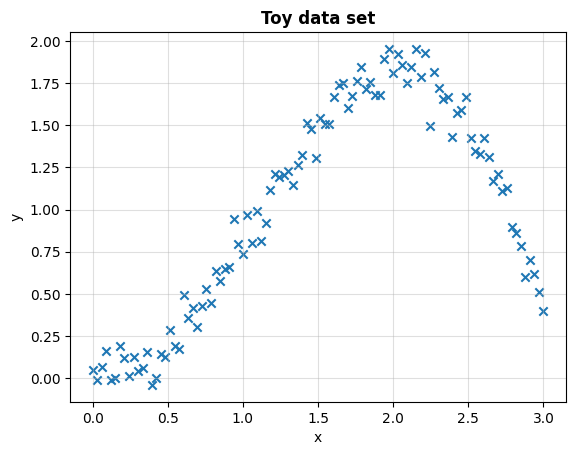

In [15]:
#Define the variables
N = 100
x = np.linspace(0, 3, N) #Generate N points from 0 to 3, np.linspace includes the endpoint
mu = 0
sigma = 0.1

#Set the random seed for reproducibility
np.random.seed(42)

#Draw random points from a normal distribution with the shape of the points
epsilon = np.random.normal(mu, sigma, size=x.shape)

#Define the relationship of x and y
y = x * np.sin(x) + epsilon

#Plotting the data set
plt.scatter(x, y, marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Toy data set', weight = 'bold')
plt.grid(alpha = 0.4)
plt.show()

# **Fitting the data**
Now, we have generated our data set based on the specified parameters. We want to fit the data but before that, we may be curious what happens if the standard deviation increases?

In this code, we plot what happens to the data set as we increase the sigma values from 0.1 to 0.5 and 1.

After observing what happens, we can also try to fit our data. In fitting the data, we can start with a simple straight line. To get the best-fit line, we can use the formula for $\theta_1$ (slope) and $\theta_0$ (intercept):

$\theta_1 = \frac{\sum_{i=1}^{N} x_i y_i - x_i \bar{y}}{\sum_{i=1}^{N} (x_i - \bar{x})^2}$ and $\theta_0 = \bar{y} - \theta_1\bar{x}$

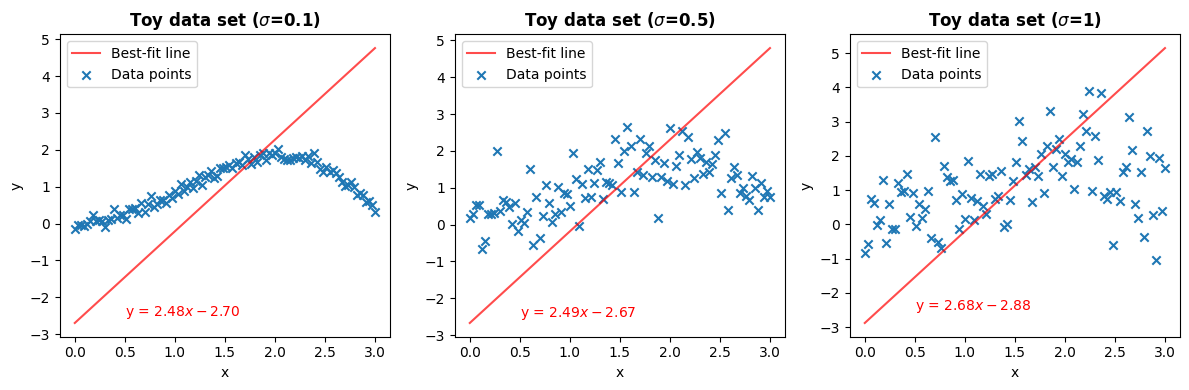

In [16]:
#Different values of sigma
sigmas = [0.1, 0.5, 1]

#Plot for increasing sigma values
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, sigma in enumerate(sigmas):
    epsilon = np.random.normal(mu, sigma, size=x.shape)
    y = x * np.sin(x) + epsilon

    #Get the best-fit line by calculating theta_1 and theta_2
    theta_1 = (np.sum(x * y) - (np.mean(x) * np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
    theta_0 = np.mean(y) - theta_1 * np.mean(x)
    equation = theta_1 * x + theta_0
    text_equation = f'y = ${theta_1:.2f}x {theta_0:.2f}$'

    axs[i].plot(x, equation, linestyle='-', label='Best-fit line', alpha = 0.7, color='red')
    axs[i].text(0.5, -2.5, text_equation, color='red')
    axs[i].scatter(x, y, marker='x', label='Data points')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_title(f'Toy data set ($\sigma$={sigma})', weight='bold')
    axs[i].legend()

plt.tight_layout()
plt.show()

As seen in the plots above, a larger value of sigma results in a broader distribution of the data points (widely spread). When we fit using a line, the best-fit line cannot accurately model the data and it is seen underfitting. Now when $\sigma$ increases, it is even much harder to determine the pattern of this data, thus resulting in a much worse fit. In this case, we can try to see what happens if we fit using using a curve.

We can use `curve_fit` from `scipy.optimize`, which uses non-linear least squares to fit a function. There are different ways to fit using a curve, may it be cubic or quadratic. In the following code, we can try to see what happens when we use a cubic polynomial.

Upon using `curve_fit`, it returns the parameter popt, which are the optimal values that minimize the sum of the squared residuals or the discrepancy between the actual data and predicted data.

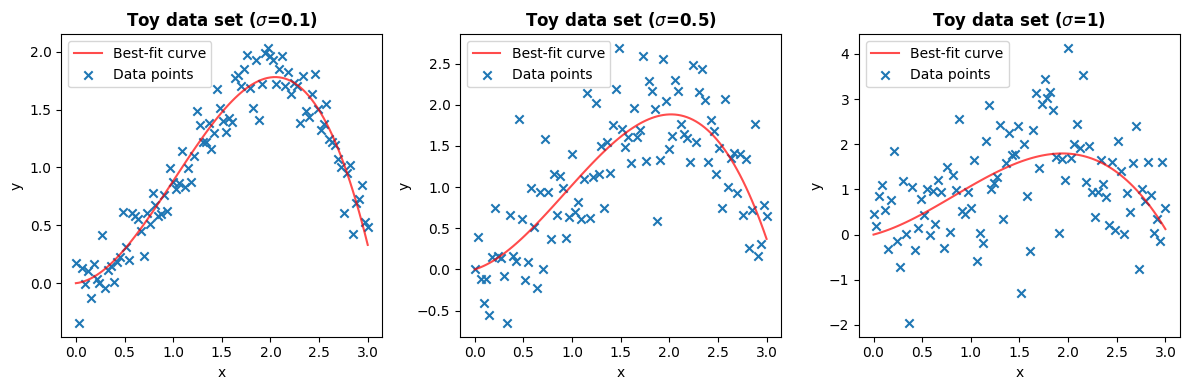

In [31]:
from scipy.optimize import curve_fit

#Cubic polynomial as fitting function
def poly_func(x, a, b, c):
    return a * x**3 + b * x**2 + c * x

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, sigma in enumerate(sigmas):
    epsilon = np.random.normal(mu, sigma, size=x.shape)
    y_fit = y + epsilon

    #Get the best-fit curve using a cubic polynomial
    popt, _ = curve_fit(poly_func, x, y_fit)  #popt is the optimal coefficients

    #Generate curve using optimal coefficients
    y_pred = poly_func(x, *popt)

    #Plotting
    axs[i].plot(x, y_pred, label='Best-fit curve', linestyle='-', alpha=0.7, color='red')
    axs[i].scatter(x, y_fit, marker='x', label='Data points')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_title(f'Toy data set ($\sigma$={sigma})', weight='bold')
    axs[i].legend()

plt.tight_layout()
plt.show()

We can compare and see that a cubic polynomial fits our data better than a linear one.

 Now what happens if we try to increase the degree of the polynomial that we will use to fit up to n degrees? Before doing that though, we can still observe from the plots above that it is much harder to fit if the standard deviation is high.

 For fitting with an n degree polynomial, we can just try to observe it for the data set with standard deviation of 0.1




PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


# **Splitting the data**

In splitting the data, we first split the data into training and testing  sets using the `train_test_split` from `sklearn.model_selection` library with `test_size = 0.5`. This results in a 50-50 split. The testing set is then split again using the same function with `test_size = 0.5` to get 25% testing and 25% validation.

In [20]:
sigma = 0.1
mu = 0
x = np.linspace(0, 3, N)

epsilon = np.random.normal(mu, sigma, size=x.shape)
y = x * np.sin(x) + epsilon

In [21]:
from sklearn.model_selection import train_test_split

#Splitting the data set twice to split into 50% training, 25% testing, and 25% validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state=42)

# **Calculating RMSE function**

We define a function `calc_rmse` that calculates for the root mean square error. This function subtracts the y actual value from the y predicted value. It then takes the square, then the mean, then the root.

The root mean square error (RMSE) tells us the standard deviation of residuals, which is the distance between the regression line and the actual data point. A low RMSE tells us that the model has less error since the data points are closer to the regression line. Thus, an RMSE of 0 means that the model predicted the actual values perfectly.

In [22]:
def calc_rmse(bfc, y):
  error = bfc - y
  square = (error)**2
  mean = np.mean(square)
  root = np.sqrt(mean)
  return root

# **Getting the best-fit curve**

In getting the best-fit curve, we can use `np.polyfit()` which fits a data within a polynomial function. In other words, using `np.polyfit` will fit a polynomial function of degree i using the x and y datapoints. It then returns coefficient values that reduces the square errors.

After obtaining the coefficient values, we use `np.poly1d` to create a polynomial function using these coefficients. We can then use this fit on our training set.


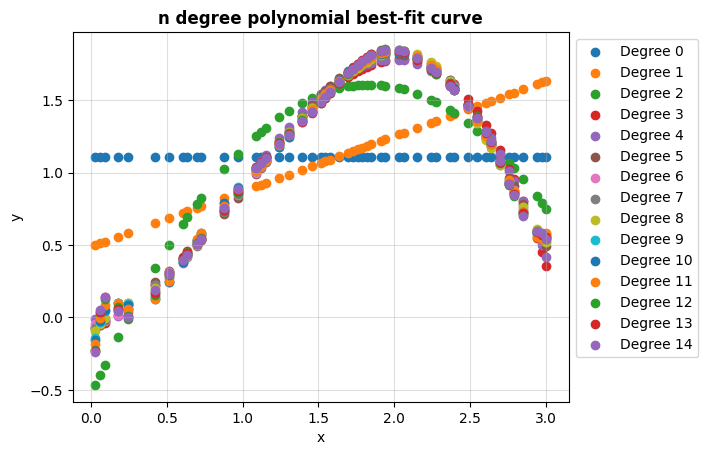

In [23]:
#Generate numbers from 0 to 14
deg = np.arange(0, 15, 1)

#Getting the best-fit
for i in deg: #For each degree from 0 to 14
  fit = np.poly1d(np.polyfit(x_train, y_train, i))
  bfc_train = fit(x_train)
  plt.scatter(x_train, bfc_train, label = f'Degree {i}')
  plt.xlabel('x')
  plt.ylabel('y')
plt.grid(alpha = 0.4)
plt.title('n degree polynomial best-fit curve', weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1))

The plot above shows the best-fit curve from n = 0 to n = 14. Quite hard to conclude something from it, so, let's disect by plotting them separately.

We can also calculate the RMSE for the training set by calling on the `calc_rmse` function and append it to the RMSE train list. To get the RMSE for the validation, we fit the validation set using the polynomial function used in the training set.

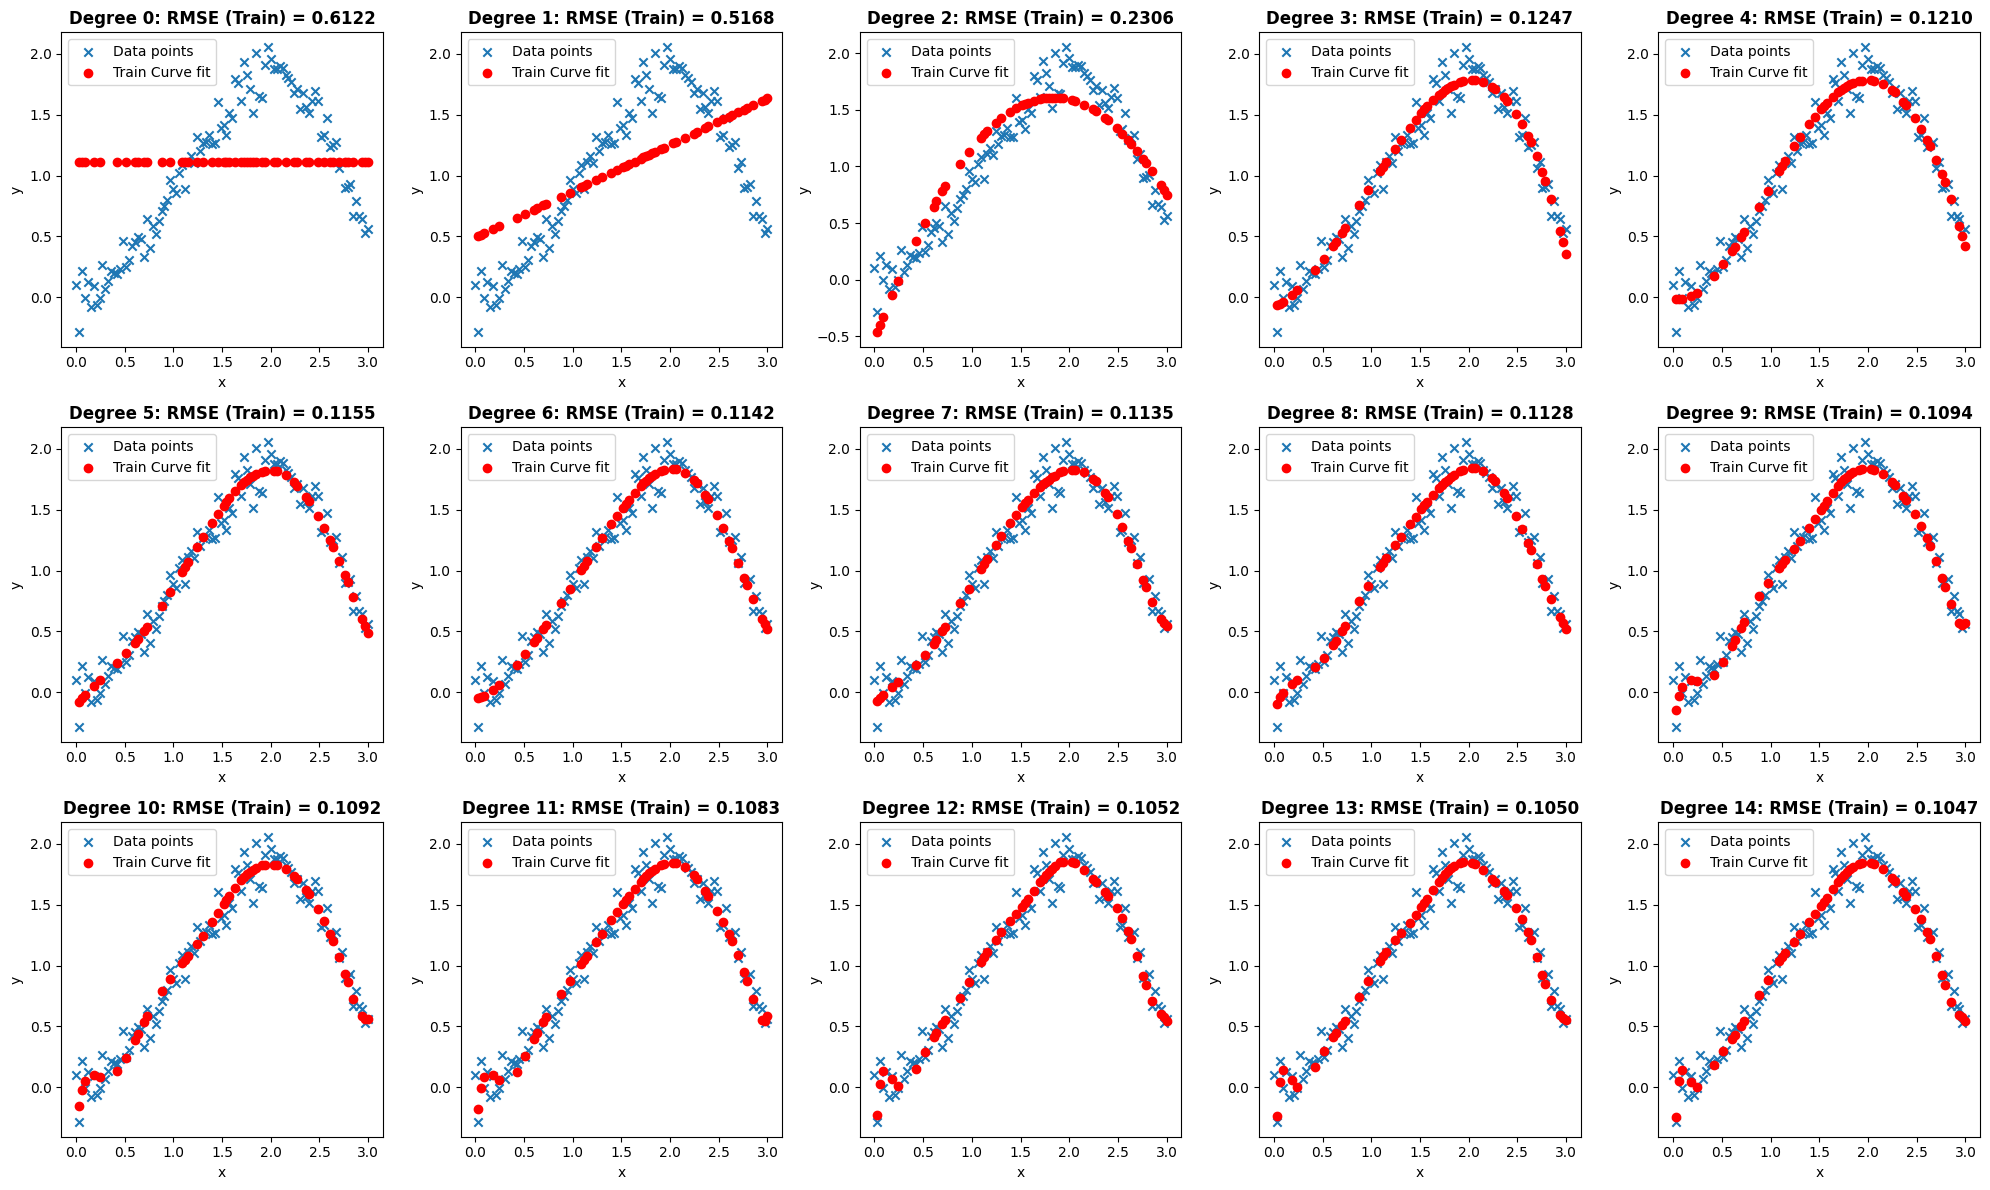

In [26]:
#Generate numbers from 0 to 14
deg = np.arange(0, 15, 1)

n_rows, n_cols = 3, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))

rmse_train_list = []
rmse_val_list =[]


for i, ax in zip(deg, axes.flat):
  #Fit the data
  fit = np.poly1d(np.polyfit(x_train, y_train, i))

  #Calculate best-fit curve
  bfc_train = fit(x_train)
  bfc_val = fit(x_val)

  #Calculate the RMSE for the training set
  rmse_train = calc_rmse(bfc_train, y_train)
  rmse_train_list.append(rmse_train)

  #Calculate the RMSE for the validation set
  rmse_val = calc_rmse(bfc_val, y_val)
  rmse_val_list.append(rmse_val)

  #Plot data points and best-fit curves
  ax.scatter(x, y, marker='x', label='Data points')
  ax.scatter(x_train, bfc_train, label='Train Curve fit', color='red')

  #Set labels and title for each subplot
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title(f'Degree {i}: RMSE (Train) = {rmse_train:.4f}', weight = 'bold')
  ax.legend()


plt.tight_layout()
plt.show()

We can see from the plots that increasing the polynomial degree improves the fit of the data. However, with its complexity increases, there is also a risk where the data is overfitting. What we mean by this is that the model may start to memorize the data. Because of this, one key take-away is: finding the right balance.

How will we be able to know that our model is already overfitting? This is where **cross-validation** comes in as it can be used to evaluate our model. There are different ways to do cross-validation, but in this code, we can compare the root mean squared error of the training and the validation set per degree.

# **Plotting the RMSE of the training and validation**


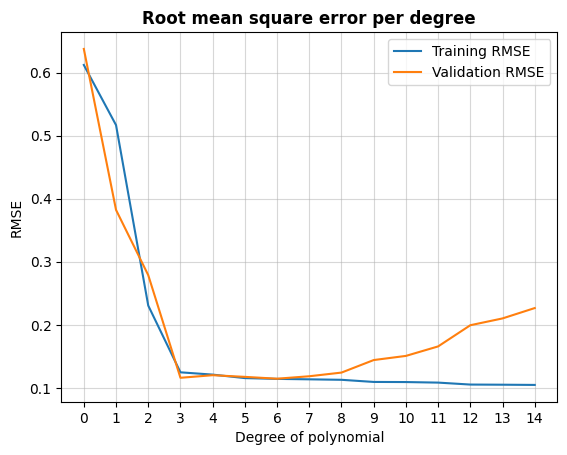

In [27]:
plt.plot(deg, rmse_train_list, label = 'Training RMSE')
plt.plot(deg, rmse_val_list, label = 'Validation RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.title('Root mean square error per degree', weight = 'bold')
plt.xticks(range(0, 15, 1))
plt.legend()
plt.grid(alpha = 0.5)

This plot shows us that both the training and validation loss decreases up to the degree 3. For higher degrees, we can see that the training RMSE continues to decrease while the validation RMSE increases. This implies that the model is high in variance, meaning that it overfits after a certain degree.

# **Minimum RMSE and Index**

To know which degree is best, we can check at which degree the RMSE of the validation set is the lowest.

In [28]:
min_rmse = min(rmse_val_list)
min_index = rmse_val_list.index(min(rmse_val_list))

print(f'Minimum RMSE: {min_rmse:.3f} at Degree {min_index}')

Minimum RMSE: 0.115 at Degree 6


# **Trying the best-fit on unseen data points**

We see that the minimum RMSE is obtained at degree 6 with an RMSE of 0.115. We can test this model onto unseen data by fitting the `x_test` and `y_test` at degree 6.



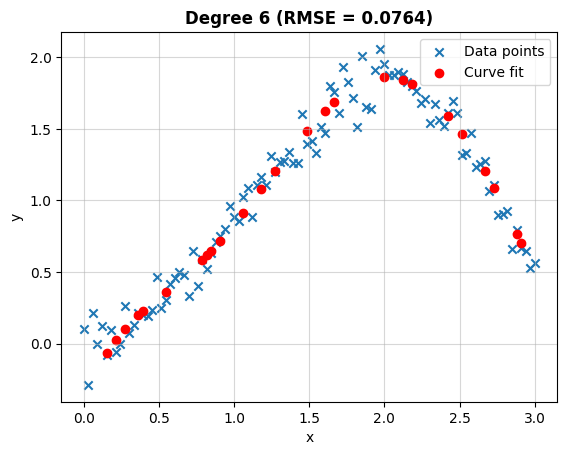

In [29]:
#Fit the data using the degree of the min_index
fit_test = np.poly1d(np.polyfit(x_test, y_test, min_index))

#Calculate best-fit curve
bfc_test = fit_test(x_test)

#Calculate the RMSE for the test set
rmse_test = calc_rmse(bfc_test, y_test)

#Plot data points and best-fit curve
plt.scatter(x, y, marker='x', label='Data points')
plt.scatter(x_test, bfc_test, label='Curve fit', color='red')

#Set labels and title for each subplot
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Degree {min_index} (RMSE = {rmse_test:.4f})', weight = 'bold')
plt.legend()
plt.grid(alpha = 0.5)
plt.show()

Tada! We get a really low RMSE of 0.0764 at degree 6.